In [68]:
import numpy as np
import pandas as pd 
import os 
os.chdir('/Users/Abhi/Downloads/')
pd.set_option('display.max_columns', None)

In [69]:
train=pd.read_csv('train_csv2022.csv')
test=pd.read_csv('test_csv2022.csv')

In [70]:
train.head()

,Property_ID,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price
0,100361,4,BHK,Apartment,Sodepur,805,Furnished,2,Kolkata,1,3,0,0,0,1,0,33012,0,0,1500,4716
1,66785,2,BHK,Apartment,Geetanjali Enclave,1093,Furnished,2,Delhi,1,9,0,0,0,1,0,74907,1,1,300,24969
2,120243,2,RK,Independent Floor,Ghatkopar West,1227,Unfurnished,2,Mumbai,0,2,0,0,0,0,0,217314,1,0,1300,24146
3,96487,1,BHK,Apartment,New Town,1022,Furnished,3,Kolkata,0,8,1,0,0,1,0,217560,1,1,3600,36260
4,95695,2,BHK,Apartment,New Town,1403,Semi-Furnished,2,Kolkata,0,7,1,1,1,1,0,704624,1,1,200,176156


In [71]:
test.head()

,Property_ID,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
0,27345,1,BHK,Independent House,Whitefield Hope Farm Junction,1088,Semi-Furnished,1,Bangalore,1,5,1,0,1,1,0,175749,1,0,700
1,111493,1,BHK,Studio Apartment,Worli,605,Furnished,1,Mumbai,0,1,0,0,0,1,1,15072,0,0,600
2,176972,3,BHK,Apartment,Aundh,1005,Furnished,4,Pune,1,5,0,0,0,1,1,29715,1,0,1900
3,66650,3,RK,Apartment,Sarvpriya Vihar,639,Semi-Furnished,3,Delhi,1,18,1,1,1,1,1,131576,1,1,3300
4,72437,1,BHK,Apartment,Khirki Extension,580,Unfurnished,1,Delhi,0,9,0,0,0,0,1,26005,0,1,1600


In [72]:
combine=pd.concat([train,test],ignore_index=False)

In [73]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134683 entries, 0 to 20202
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Property_ID       134683 non-null  int64  
 1   room              134683 non-null  int64  
 2   layout_type       134683 non-null  object 
 3   property_type     134683 non-null  object 
 4   locality          134683 non-null  object 
 5   area              134683 non-null  int64  
 6   furnish_type      134683 non-null  object 
 7   bathroom          134683 non-null  int64  
 8   city              134683 non-null  object 
 9   parking_spaces    134683 non-null  int64  
 10  floor             134683 non-null  int64  
 11  pet_friendly      134683 non-null  int64  
 12  power_backup      134683 non-null  int64  
 13  washing_machine   134683 non-null  int64  
 14  air_conditioner   134683 non-null  int64  
 15  geyser/solar      134683 non-null  int64  
 16  security_deposit  134

In [74]:
combine.describe()

,Property_ID,room,area,bathroom,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price
count,134683.000000,134683.000000,134683.000000,134683.000000,134683.000000,134683.000000,134683.000000,134683.000000,134683.000000,134683.000000,134683.000000,1.346830e+05,134683.000000,134683.000000,134683.000000,114480.000000
mean,96036.100777,2.029677,1480.388490,2.040488,0.534388,9.163087,0.527602,0.337051,0.472561,0.692626,0.440137,2.202480e+05,0.561838,0.595851,2033.024212,36708.363269
std,55565.228125,0.937308,1412.464718,0.867065,0.498818,5.957549,0.499239,0.472704,0.499248,0.461407,0.496405,4.204503e+05,0.496163,0.490728,1159.635981,62777.643152
min,2.000000,1.000000,81.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.180000e+03,0.000000,0.000000,0.000000,1590.000000
25%,47940.000000,1.000000,759.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.580250e+04,0.000000,0.000000,1100.000000,12012.000000
50%,95950.000000,2.000000,1114.000000,2.000000,1.000000,9.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.142640e+05,1.000000,1.000000,2000.000000,20822.000000
75%,144194.500000,3.000000,1580.000000,2.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.207045e+05,1.000000,1.000000,3000.000000,35996.500000
max,192405.000000,5.000000,13942.000000,5.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.940780e+06,1.000000,1.000000,4000.000000,799325.000000


# Exploratory Data analaysis 

In [75]:
combine.select_dtypes(include=np.number).columns

Index(['Property_ID', 'room', 'area', 'bathroom', 'parking_spaces', 'floor',
       'pet_friendly', 'power_backup', 'washing_machine', 'air_conditioner',
       'geyser/solar', 'security_deposit', 'CCTV/security', 'lift',
       'neighbourhood', 'price'],
      dtype='object')

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

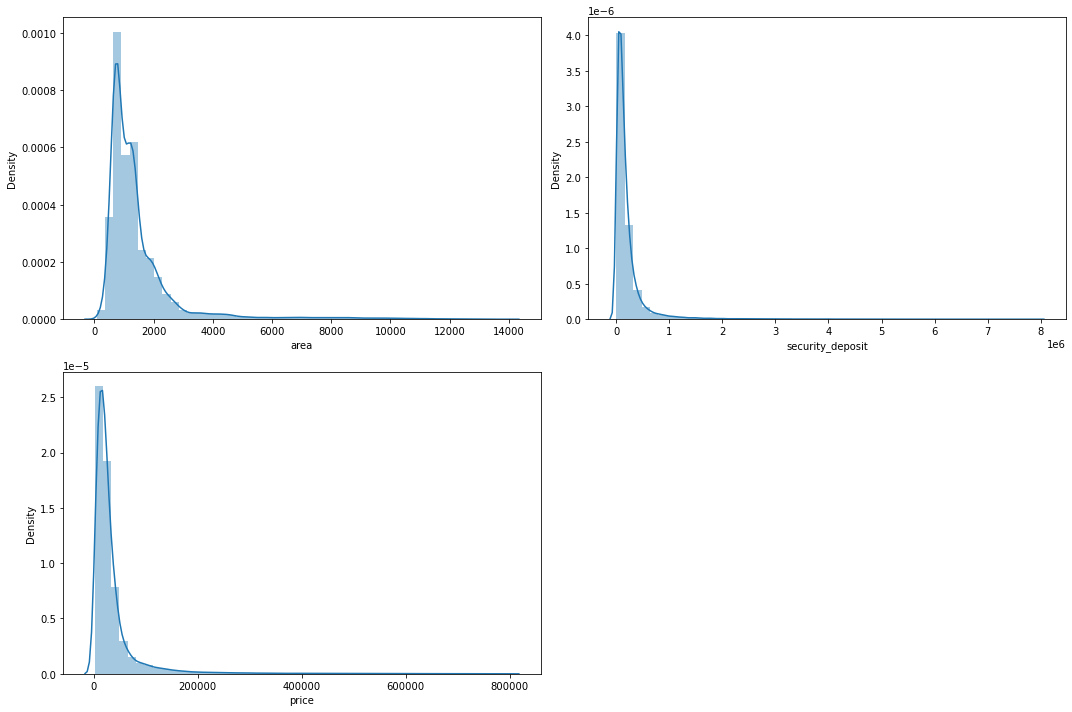

In [77]:
num=[ 'area', 'security_deposit','price']
a=2
b=2
c=1
for i in num:
    plt.subplot(a,b,c)
    sns.distplot(combine[i])
    c+=1
    
plt.tight_layout()
plt.show()

In [78]:
combine.columns

Index(['Property_ID', 'room', 'layout_type', 'property_type', 'locality',
       'area', 'furnish_type', 'bathroom', 'city', 'parking_spaces', 'floor',
       'pet_friendly', 'power_backup', 'washing_machine', 'air_conditioner',
       'geyser/solar', 'security_deposit', 'CCTV/security', 'lift',
       'neighbourhood', 'price'],
      dtype='object')

In [79]:
ob=['room','layout_type', 'property_type', 'furnish_type', 'bathroom', 'city', 'parking_spaces', 'floor',
       'pet_friendly', 'power_backup', 'washing_machine', 'air_conditioner',
       'geyser/solar', 'CCTV/security', 'lift']

In [80]:
len(ob)

15

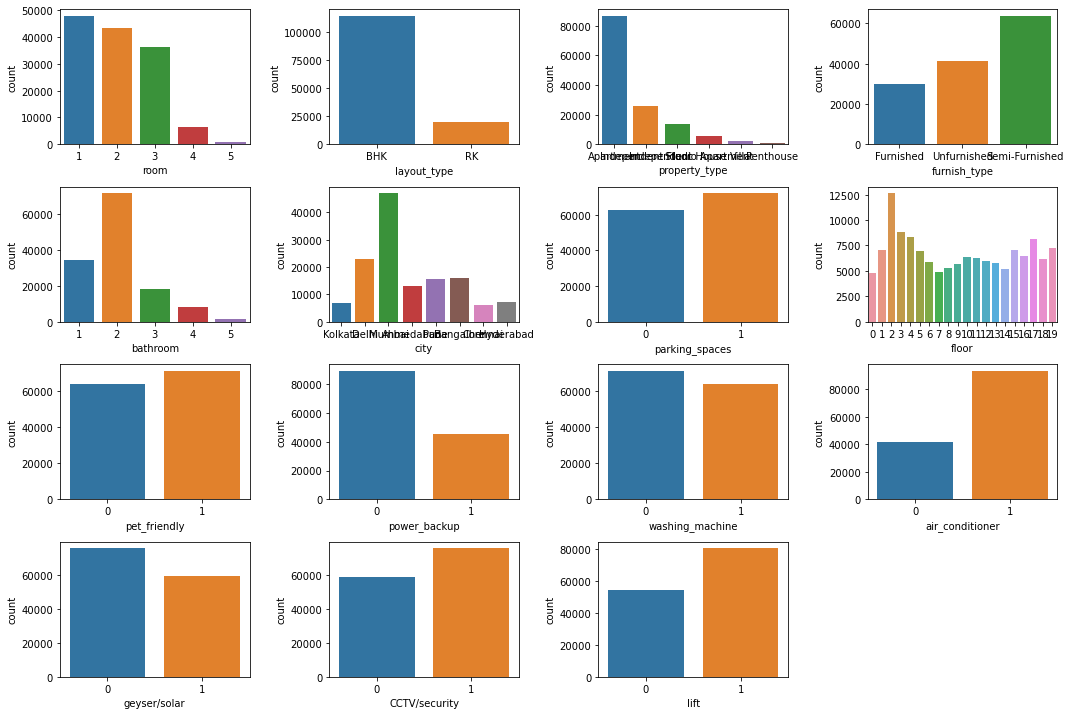

In [81]:
plt.rcParams['figure.figsize']=[15,10]
a=4
b=4
c=1
for i in ob:
    plt.subplot(a,b,c)
    sns.countplot(combine[i])
    c+=1
    
plt.tight_layout()
plt.show()

# Inferences. 

1.Most of the house rentals are found in Mumbai followed by Delhi. 
2.Most of the Properties have lift followed by CCTV and AC
3.Properties do not have Geysers followed by less Washing Machine and no Power back up. 
4.Pet Friendly houses exist in the data. 
5.No of bathrooms range from 1-5. 
6.Max bedrooms are 5 and there the houses in the data are from 1 BHK to 5 BHK 
7. Most the rental houses are semi furnished in nature.
8. The frequency of apartments are more than any other type of property in the dataset.

In [82]:
# Checking the missing values 

In [83]:
combine.isnull().sum()

Property_ID             0
room                    0
layout_type             0
property_type           0
locality                0
area                    0
furnish_type            0
bathroom                0
city                    0
parking_spaces          0
floor                   0
pet_friendly            0
power_backup            0
washing_machine         0
air_conditioner         0
geyser/solar            0
security_deposit        0
CCTV/security           0
lift                    0
neighbourhood           0
price               20203
dtype: int64

# Bivariate Analysis 

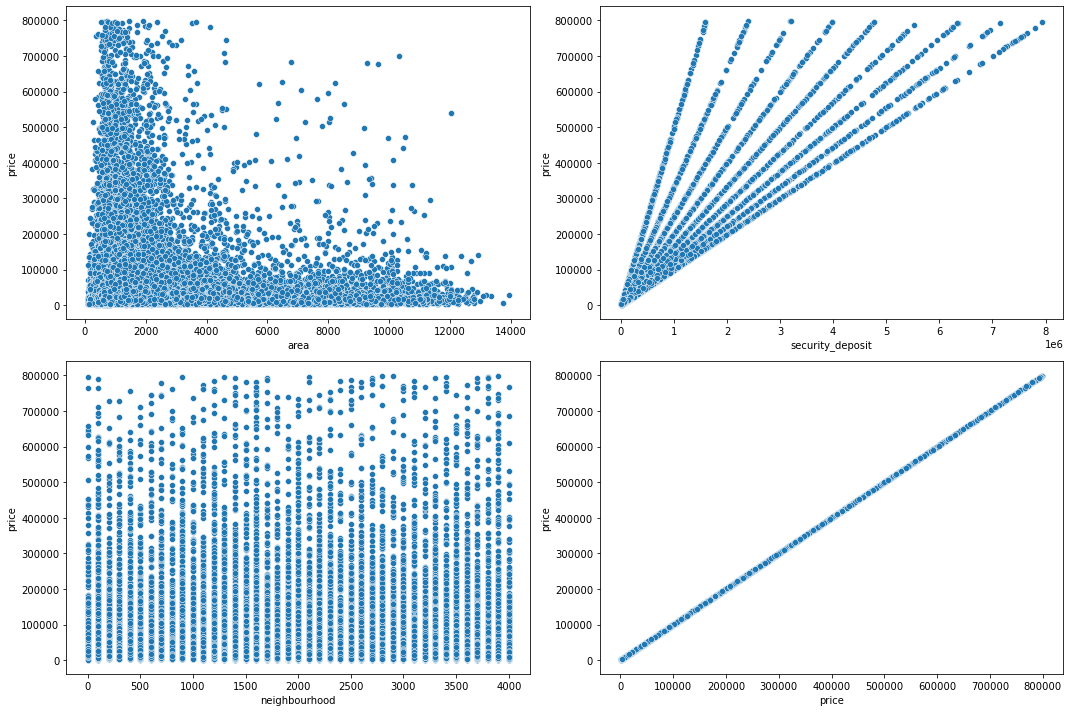

In [84]:
num=[ 'area', 'security_deposit','neighbourhood','price']
a=2
b=2
c=1
for i in num:
    plt.subplot(a,b,c)
    sns.scatterplot(x=combine[i],y='price',data=combine)
    c+=1
    
plt.tight_layout()
plt.show()

In [85]:
combine['neighbourhood']/1000

0        1.5
1        0.3
2        1.3
3        3.6
4        0.2
        ... 
20198    0.2
20199    0.9
20200    1.5
20201    2.6
20202    1.4
Name: neighbourhood, Length: 134683, dtype: float64

<AxesSubplot:xlabel='neighbourhood', ylabel='price'>

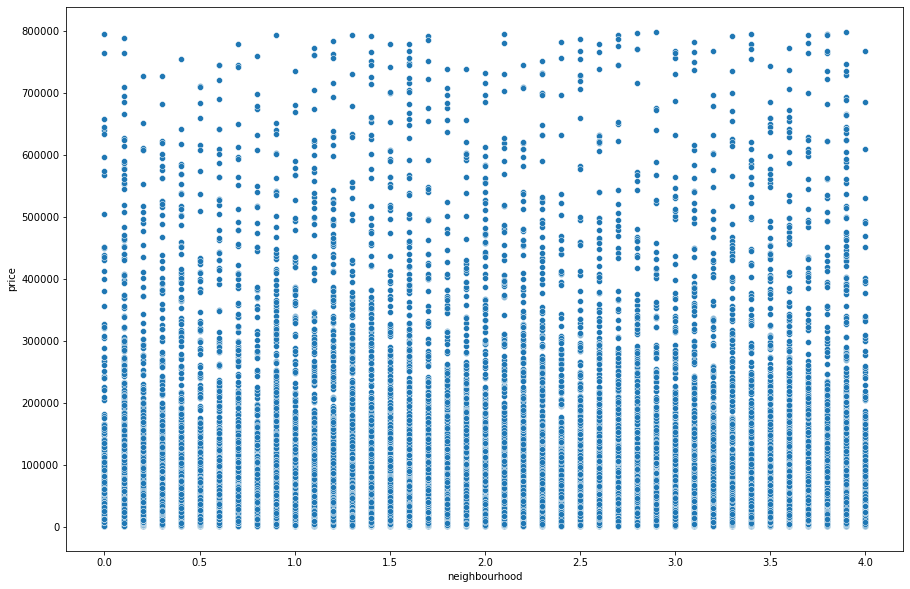

In [86]:
sns.scatterplot(x=combine['neighbourhood']/1000,y='price',data=combine)

In [87]:
# Lets bin the neibhourhood 
combine['neighbourhood']=combine['neighbourhood']/1000

In [88]:
combine['neighbourhood'].describe()

count    134683.000000
mean          2.033024
std           1.159636
min           0.000000
25%           1.100000
50%           2.000000
75%           3.000000
max           4.000000
Name: neighbourhood, dtype: float64

In [89]:
def outcome(x):
    if(x<=1):
        return('Proximity')
    elif(1<x<=2):
        return('Vicinity')
    else:
        return('Far')

In [90]:
combine['Neighbour_dist']=combine.neighbourhood.apply(outcome)

In [91]:
combine.groupby('Neighbour_dist')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
Neighbour_dist,,,,,,,,
Far,54892.0,36046.794506,62801.293570,1590.0,11502.0,20152.0,35046.25,799325.0
Proximity,27237.0,38163.169769,63803.113548,1624.0,12854.0,21952.0,37345.00,795827.0
Vicinity,32351.0,36606.056320,61841.869279,1668.0,12181.0,21161.0,36467.00,794823.0


In [92]:
combine.head()

,Property_ID,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price,Neighbour_dist
0,100361,4,BHK,Apartment,Sodepur,805,Furnished,2,Kolkata,1,3,0,0,0,1,0,33012,0,0,1.5,4716.0,Vicinity
1,66785,2,BHK,Apartment,Geetanjali Enclave,1093,Furnished,2,Delhi,1,9,0,0,0,1,0,74907,1,1,0.3,24969.0,Proximity
2,120243,2,RK,Independent Floor,Ghatkopar West,1227,Unfurnished,2,Mumbai,0,2,0,0,0,0,0,217314,1,0,1.3,24146.0,Vicinity
3,96487,1,BHK,Apartment,New Town,1022,Furnished,3,Kolkata,0,8,1,0,0,1,0,217560,1,1,3.6,36260.0,Far
4,95695,2,BHK,Apartment,New Town,1403,Semi-Furnished,2,Kolkata,0,7,1,1,1,1,0,704624,1,1,0.2,176156.0,Proximity


In [93]:
# convert the data types 
combine['parking_spaces']=combine.parking_spaces.astype('object')
combine['floor']=combine.floor.astype('object')
combine['pet_friendly']=combine.pet_friendly.astype('object')
combine['power_backup']=combine.power_backup.astype('object')
combine['washing_machine']=combine.washing_machine.astype('object')
combine['air_conditioner']=combine.air_conditioner.astype('object')
combine['geyser/solar']=combine['geyser/solar'].astype('object')
combine['CCTV/security']=combine['CCTV/security'].astype('object')
combine['lift']=combine['lift'].astype('object')

In [94]:
combine['room']=combine.room.astype('object')
combine['bathroom']=combine.bathroom.astype('object')


In [95]:
# City in north ,south ,west region
east=['Kolkata']
north=['Delhi','Ahmedabad']
west=['Pune','Mumbai']
south=['Banglore','Chennai','Hyderabad']

In [96]:
def region(x):
    if x in north:
        return ('North')
    elif x in west:
        return('West')
    elif x in south:
        return('South')
    else:
        return('East')

In [97]:
combine['City_cat']=combine.city.apply(region)

In [98]:
# As we can say that there is issue with the data capturing
# converting RK in to BHK where the room is>1


In [99]:
combine.loc[(combine.layout_type=='RK')&(combine.room>1),'layout_type']='BHK'

In [100]:
# fixing washroom for rk

In [101]:
combine.loc[(combine.layout_type=='RK')&(combine.bathroom>1),'bathroom']='1'

In [102]:
combine.head()

,Property_ID,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price,Neighbour_dist,City_cat
0,100361,4,BHK,Apartment,Sodepur,805,Furnished,2,Kolkata,1,3,0,0,0,1,0,33012,0,0,1.5,4716.0,Vicinity,East
1,66785,2,BHK,Apartment,Geetanjali Enclave,1093,Furnished,2,Delhi,1,9,0,0,0,1,0,74907,1,1,0.3,24969.0,Proximity,North
2,120243,2,BHK,Independent Floor,Ghatkopar West,1227,Unfurnished,2,Mumbai,0,2,0,0,0,0,0,217314,1,0,1.3,24146.0,Vicinity,West
3,96487,1,BHK,Apartment,New Town,1022,Furnished,3,Kolkata,0,8,1,0,0,1,0,217560,1,1,3.6,36260.0,Far,East
4,95695,2,BHK,Apartment,New Town,1403,Semi-Furnished,2,Kolkata,0,7,1,1,1,1,0,704624,1,1,0.2,176156.0,Proximity,East


In [103]:
combine.locality.nunique()
# there arew 3700 localities

3706

In [104]:
# Map the Loaclity 
encoded=train.groupby('locality')['price'].median()

In [105]:
combine['locality']=combine.locality.map(encoded)

In [106]:
# Furnished Type
furnishencoded=train.groupby('furnish_type')['price'].median()
combine['furnish_type']=combine.furnish_type.map(furnishencoded)

In [107]:
#Frequncy Encoding for floor 
#combine['floor_encoded']=combine.floor.value_counts()/combine.shape[0]

In [108]:
combine.isnull().sum()

Property_ID             0
room                    0
layout_type             0
property_type           0
locality              214
area                    0
furnish_type            0
bathroom                0
city                    0
parking_spaces          0
floor                   0
pet_friendly            0
power_backup            0
washing_machine         0
air_conditioner         0
geyser/solar            0
security_deposit        0
CCTV/security           0
lift                    0
neighbourhood           0
price               20203
Neighbour_dist          0
City_cat                0
dtype: int64

In [109]:
# Drop the vars 
combine.drop(['Property_ID','city'],axis=1,inplace=True)

In [110]:
# Impute Locality with a Dummy number 
combine.locality.fillna(-9999,inplace=True)

In [111]:
combine.isnull().sum()

room                    0
layout_type             0
property_type           0
locality                0
area                    0
furnish_type            0
bathroom                0
parking_spaces          0
floor                   0
pet_friendly            0
power_backup            0
washing_machine         0
air_conditioner         0
geyser/solar            0
security_deposit        0
CCTV/security           0
lift                    0
neighbourhood           0
price               20203
Neighbour_dist          0
City_cat                0
dtype: int64

In [112]:
combine.replace(to_replace='Independent floor',value='Independent House',inplace=True)

In [113]:
# We have to fix prop type for RK
combine.loc[combine.layout_type=='RK','property_type'].value_counts()

Apartment            5278
Independent Floor    2089
Independent House    1203
Studio Apartment      791
Villa                 289
Penthouse              54
Name: property_type, dtype: int64

In [114]:
combine.loc[(combine.layout_type=='RK')&(combine.property_type=='Penthouse'),'property_type']='Studio Apartment'
combine.loc[(combine.layout_type=='RK')&(combine.property_type=='Villa'),'property_type']='Studio Apartment'

In [115]:
#pd.get_dummies(combine,drop_first=True).shape

combine.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 134683 entries, 0 to 20202
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   room              134683 non-null  object 
 1   layout_type       134683 non-null  object 
 2   property_type     134683 non-null  object 
 3   locality          134683 non-null  float64
 4   area              134683 non-null  int64  
 5   furnish_type      134683 non-null  float64
 6   bathroom          134683 non-null  object 
 7   parking_spaces    134683 non-null  object 
 8   floor             134683 non-null  object 
 9   pet_friendly      134683 non-null  object 
 10  power_backup      134683 non-null  object 
 11  washing_machine   134683 non-null  object 
 12  air_conditioner   134683 non-null  object 
 13  geyser/solar      134683 non-null  object 
 14  security_deposit  134683 non-null  int64  
 15  CCTV/security     134683 non-null  object 
 16  lift              134

In [116]:
combine['bathroom']=combine.bathroom.astype('int')

combine['room']=combine.room.astype('int')


In [117]:
combine.shape

(134683, 21)

In [118]:
dummy=pd.get_dummies(combine,drop_first=True)

In [119]:
train.shape,test.shape

((114480, 21), (20203, 20))

In [120]:
newtrain=dummy.iloc[0:train.shape[0],:]
newtest=dummy.iloc[train.shape[0]:,:]

In [121]:
newtrain.shape,newtest.shape

((114480, 46), (20203, 46))

In [122]:
newtrain.columns

Index(['room', 'locality', 'area', 'furnish_type', 'bathroom',
       'security_deposit', 'neighbourhood', 'price', 'layout_type_RK',
       'property_type_Independent Floor', 'property_type_Independent House',
       'property_type_Penthouse', 'property_type_Studio Apartment',
       'property_type_Villa', 'parking_spaces_1', 'floor_1', 'floor_2',
       'floor_3', 'floor_4', 'floor_5', 'floor_6', 'floor_7', 'floor_8',
       'floor_9', 'floor_10', 'floor_11', 'floor_12', 'floor_13', 'floor_14',
       'floor_15', 'floor_16', 'floor_17', 'floor_18', 'floor_19',
       'pet_friendly_1', 'power_backup_1', 'washing_machine_1',
       'air_conditioner_1', 'geyser/solar_1', 'CCTV/security_1', 'lift_1',
       'Neighbour_dist_Proximity', 'Neighbour_dist_Vicinity', 'City_cat_North',
       'City_cat_South', 'City_cat_West'],
      dtype='object')

# Statistical test and Unsupervised Learning

In [123]:
# Num Vars 


cols=['locality','furnish_type','area','security_deposit','Floor_encoded','neighbourhood']
localdata=newtrain.loc[:,cols]

KeyError: "['Floor_encoded'] not in index"

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model=KMeans(random_state=42)
visual=KElbowVisualizer(estimator=model,k=(2,10))


In [ ]:
visual.fit(localdata)
visual.show()

In [ ]:
# Fit the clustering Model 


model=KMeans(random_state=42,n_clusters=4)
newtrain['Clusters']=model.fit_predict(localdata)

In [ ]:
# Apply Anova to check the significance of the cluster Genrated



In [ ]:
from statsmodels.formula.api import ols
olsmodel=ols('price~Clusters',data=newtrain).fit()
from statsmodels.stats.anova import anova_lm
print(anova_lm(olsmodel))

In [ ]:
localtest=newtest.loc[:,cols]

model=KMeans(random_state=42,n_clusters=4)

newtest['Clusters']=model.fit_predict(localtest)

In [ ]:
newtrain.head()

In [124]:
from sklearn.model_selection import train_test_split

x=newtrain.drop('price',axis=1)
y=newtrain.price
#xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=786,stratify=newtrain['Clusters'])

In [ ]:
# Model Building 

from sklearn.tree import DecisionTreeRegressor


In [127]:
newtest.drop('price',axis=1,inplace=True)

In [ ]:
dtree=DecisionTreeRegressor(max_depth=17,random_state=494)
model=dtree.fit(x,y).predict(newtest)

In [ ]:
model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf=RandomForestRegressor(n_estimators=500,max_depth=21,random_state=494,min_samples_split=10,ccp_alpha=0.1)
model=rf.fit(x,y).predict(newtest)

In [ ]:
model

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgbm=LGBMRegressor(learning_rate=0.001,n_estimators=500,n_jobs=-1)
model2=lgbm.fit(x,y).predict(newtest)

In [125]:
from sklearn.ensemble import GradientBoostingRegressor


In [131]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5,shuffle = True)

gbm = GradientBoostingRegressor(n_estimators=250,max_depth=10,random_state = 494)
pred_model = pd.DataFrame()

n =10
for i in range(n):
    folds = next(kfold.split(newtrain))
    xtrain = x.iloc[folds[0]]
    ytrain = y.iloc[folds[0]]
    pred_model[i] = gbm.fit(xtrain,ytrain).predict(newtest)
    
    
vals = pred_model.median(axis=1)


In [132]:
# Model building



submission=pd.DataFrame({'Property_ID':test.Property_ID,'price':vals})
#submission.to_csv('RFmodel1.csv',index=False)

In [ ]:
## Stacking model with cv
from sklearn.ensemble import StackingRegressor

level_0 =[("dtree",dtree),("rf",rf),("xgb",xgb),("lgbm",lgbm)]

stack= StackingRegressor(estimators=level_0, final_estimator= gbm)
pred_model=pd.DataFrame()

n =10
for i in range(n):
    folds = next(kfold.split(newtrain))
    xtrain = x.iloc[folds[0]]
    ytrain = y.iloc[folds[0]]
    pred_model[i] = gbm.fit(xtrain, ytrain).predict(newtest)
    
    
vals1 = pred_model.median(axis=1)
print("RMSE for {} model is {}:".format("10CV",
                                       np.sqrt(mean_squared_error(ytest,
                                                                 vals))))

In [133]:
submission.to_csv('ldmodel11.csv',index=False)